In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Create a reference to the CSV and import it into a Pandas DataFrame

path = "Resources_final/"

countries = pd.read_csv(path + "countries_Modified.csv", sep=",")
cities = pd.read_csv(path + "cities_Modify.csv", sep=",")
employees = pd.read_csv(path + "employees_Modified.csv", sep=",")
products = pd.read_csv(path + "products_Modified.csv", sep=",")
categories = pd.read_csv(path + "Categories_Modified.csv", sep=",")
customers = pd.read_csv(path + "customers_modified.csv", sep=",")
sales = pd.read_csv(path + "sales_Modified.csv", sep=",")


# Check-point

The below code allows us to check the quantity of each products.

In [4]:

grouped = sales.groupby("ProductID")


Total_count = grouped["Quantity"].sum()

Product_quantity = pd.DataFrame({"Quantity Count": Total_count })
Product_quantity.head()

,Quantity Count
ProductID,
1,28687
2,29248
3,30386
4,30015
5,29769


# Merge of sales and product data

In [5]:

#Merging sales and product data
sales_product_merge = pd.merge(pd.merge(sales, products, how="outer", on="ProductID"),
                               categories, how="outer", on="CategoryID")
                              
sales_product_merge

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,CategoryName
0,1,6,27039,381,7,NaN,0,38:25.4,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
1,651,2,36984,381,10,0.1,0,10:35.2,XQL4NP8GP3LIJBPC78BR,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
2,984,18,98474,381,25,0.2,0,51:09.2,W57VJBEIM4PJ99L40VCT,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
3,1077,14,47778,381,13,0.2,0,51:47.2,JRWW0M7TOFQA29YTPL9Y,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
4,1396,4,62919,381,16,NaN,0,NaN,DFDKR0C1CPMTNMTHWN9Z,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
5,1998,9,36164,381,10,0.2,0,50:51.3,ZDOFF40MSTU235347SRQ,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
6,2750,22,48026,381,13,NaN,0,21:24.4,5Z7T6BWY0C6AFOCTXQQ0,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
7,4283,17,35899,381,10,0.2,0,09:42.6,NPI980H3UQQ229ELYO6E,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
8,4303,9,15370,381,4,0.2,0,31:04.3,FXLOOSXLUB9PKW78R2SU,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections
9,4649,4,41256,381,11,0.2,0,37:05.4,A8A6LCUKKBZ214KGC2JZ,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0,Confections


# Insight-1: Allergic products among different categoriesID


In [6]:

#Allergic products 
allergic_products = sales_product_merge.groupby(["CategoryName","IsAllergic","ProductName"])

# Total sum of quantities
sum_of_quantity = allergic_products["Quantity"].sum()

#Convert into Dataframe
allergic_grouped_df = pd.DataFrame({"Max_Quantity_Sold": sum_of_quantity})
allergic_grouped_df.head()


Max_Quantity_Sold
CategoryName IsAllergic ProductName                                      
Beverages    False      Assorted Desserts                           30140
                        Bouq All Italian - Primerba                 30732
                        Bread - Roll, Soft White Round              30488
                        Cheese - Mozzarella                         30470
                        Cheese - Taleggio D.o.p.                    31981

The above table seems that the CategoryName is not a reliable feature of this dataset, since for example we can see that the Cheese-Mozzarella product is classified as Beverages instead of Dairy.

In [7]:
# idxmax is used to filter the rows with max value in the column
allergic_max = allergic_grouped_df.loc[allergic_grouped_df.groupby(["CategoryName","IsAllergic"])["Max_Quantity_Sold"].idxmax()]

allergic_max_values = allergic_max.reset_index()
allergic_max_values


,CategoryName,IsAllergic,ProductName,Max_Quantity_Sold
0,Beverages,False,Cheese - Taleggio D.o.p.,31981
1,Beverages,True,Mustard - Seed,31039
2,Cereals,False,"Sole - Dover, Whole, Fresh",30988
3,Cereals,True,Chocolate - Dark,31345
4,Confections,False,Initation Crab Meat,31053
5,Confections,True,Tea - Herbal Sweet Dreams,31475
6,Dairy,False,Apricots Fresh,31425
7,Dairy,True,Wine - White Cab Sauv.on,31614
8,Grain,False,Bandage - Fexible 1x3,31542
9,Grain,True,Milk Powder,31065


# Non-Allergic Products

In [8]:

#Filter only non-allergic products
allergic_false_products = allergic_max_values.loc[allergic_max_values['IsAllergic'] == False]

allergic_false_products

,CategoryName,IsAllergic,ProductName,Max_Quantity_Sold
0,Beverages,False,Cheese - Taleggio D.o.p.,31981
2,Cereals,False,"Sole - Dover, Whole, Fresh",30988
4,Confections,False,Initation Crab Meat,31053
6,Dairy,False,Apricots Fresh,31425
8,Grain,False,Bandage - Fexible 1x3,31542
10,Meat,False,"Pepsi - Diet, 355 Ml",31373
12,Poultry,False,"Nut - Chestnuts, Whole",31490
14,Produce,False,"Juice - Cranberry, 341 Ml",31299
16,Seafood,False,Bread Crumbs - Japanese Style,31767
18,Shell fish,False,"Appetizer - Mini Egg Roll, Shrimp",32179


In [9]:
#Maximum value in the "Max_Quantity_Sold" column
max_value_nonallergic = allergic_false_products["Max_Quantity_Sold"].max()
max_value_nonallergic

32179

# Plot for Non-Allergic products

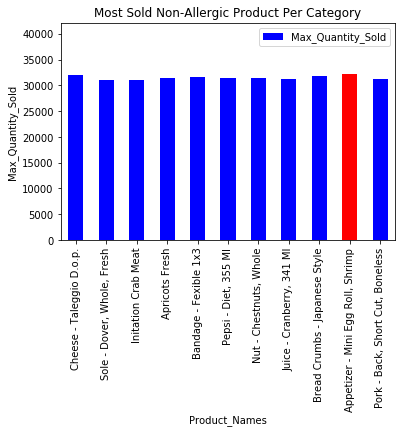

In [14]:

# Create a bar chart based upon the above data

max_quantity_false_list = allergic_false_products["Max_Quantity_Sold"].tolist()

colors = tuple(np.where(allergic_false_products["Max_Quantity_Sold"] == max_value_nonallergic , 'red', 'blue'))
allergic_false_products.plot(kind="bar",x = "ProductName",y = "Max_Quantity_Sold", color = colors, align="center")
    
# Set the limits of the y axis
plt.ylim(0, max(max_quantity_false_list)+10000)


# Give the chart a title, x label, and y label
plt.title("Most Sold Non-Allergic Product Per Category")
plt.xlabel("Product_Names")
plt.ylabel("Max_Quantity_Sold")

plt.savefig("output/Non_Allergic_Products")
plt.show()

# Allergic Products

In [15]:
#Filter only allergic products
allergic_true_products = allergic_max_values.loc[allergic_max_values['IsAllergic'] == True]
allergic_true_products

,CategoryName,IsAllergic,ProductName,Max_Quantity_Sold
1,Beverages,True,Mustard - Seed,31039
3,Cereals,True,Chocolate - Dark,31345
5,Confections,True,Tea - Herbal Sweet Dreams,31475
7,Dairy,True,Wine - White Cab Sauv.on,31614
9,Grain,True,Milk Powder,31065
11,Meat,True,Eggplant - Asian,31381
13,Poultry,True,"Liners - Banana, Paper",31075
15,Produce,True,Bay Leaf,31518
17,Seafood,True,Durian Fruit,30942
19,Shell fish,True,Coffee Decaf Colombian,32395


In [16]:
# #Maximum value in the "Max_Quantity_Sold" column
max_value_allergic = allergic_true_products["Max_Quantity_Sold"].max()
max_value_allergic

# max_quantity_list = allergic_true_products["Max_Quantity_Sold"].tolist


32395

# Plot for Allergic products

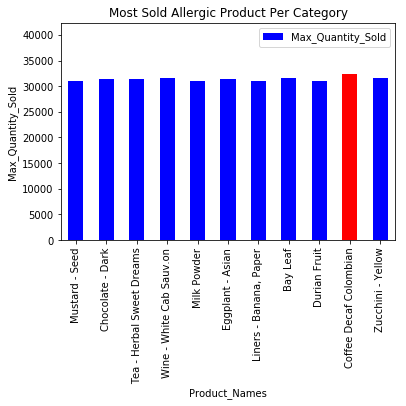

In [18]:
# Create a bar chart based upon the above data

max_quantity_true_list = allergic_true_products["Max_Quantity_Sold"].tolist()

colors = tuple(np.where(allergic_true_products["Max_Quantity_Sold"] == max_value_allergic , 'red', 'blue'))
allergic_true_products.plot(kind="bar",x = "ProductName",y = "Max_Quantity_Sold", color = colors, align="center")
    
# Set the limits of the y axis
plt.ylim(0, max(max_quantity_true_list)+10000)

# Give the chart a title, x label, and y label
plt.title("Most Sold Allergic Product Per Category")
plt.xlabel("Product_Names")
plt.ylabel("Max_Quantity_Sold")

plt.savefig("output/Allergic_Products")
plt.show()